In [3]:
import pandas as pd
import warnings
import datetime 

warnings.filterwarnings('ignore')

nyc_data = pd.read_csv(r"C:\Users\freya\Downloads\archive\NYC311data.csv")


In [4]:
nyc_data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [13]:
nyc_data.info()
nyc_data['Created Date']= pd.to_datetime(nyc_data['Created Date'])
nyc_data['Closed Date']= pd.to_datetime(nyc_data['Closed Date'])

nyc_data['Request_Closing_Time'] = nyc_data['Closed Date'].values - nyc_data['Created Date'].values
# nyc_data['Request_Closing_Time']=nyc_data['Request_Closing_Time'].astype('datetime64[s]')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [14]:
test1data = nyc_data[['Complaint Type','Request_Closing_Time']]
test1data.fillna(0)

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,0 days 00:55:15
1,Blocked Driveway,0 days 01:26:16
2,Blocked Driveway,0 days 04:51:31
3,Illegal Parking,0 days 07:45:14
4,Illegal Parking,0 days 03:27:02
...,...,...
300693,Noise - Commercial,0
300694,Blocked Driveway,0 days 02:00:31
300695,Noise - Commercial,0 days 03:07:17
300696,Noise - Commercial,0 days 04:05:33


In [15]:
#test1data.groupby('Complaint Type').sum()
test1data.dtypes

Complaint Type                   object
Request_Closing_Time    timedelta64[ns]
dtype: object

In [16]:
groups = {}
for group_name, group_data in test1data.groupby('Complaint Type'):
    groups[group_name] = group_data['Request_Closing_Time']
groups

{'Agency Issues': 186023   0 days 07:32:00
 187856   0 days 10:23:00
 207251   0 days 02:42:16
 239986   0 days 06:51:26
 246205   0 days 01:07:53
 279079   0 days 02:57:08
 Name: Request_Closing_Time, dtype: timedelta64[ns],
 'Animal Abuse': 89       0 days 00:26:10
 140      0 days 01:10:06
 164      0 days 02:14:55
 189      0 days 02:39:28
 247      0 days 01:11:02
                ...      
 300418   0 days 01:09:43
 300458   0 days 01:22:05
 300483   0 days 00:42:52
 300486   0 days 07:45:44
 300490   0 days 03:23:52
 Name: Request_Closing_Time, Length: 7778, dtype: timedelta64[ns],
 'Animal in a Park': 283132   14 days 00:50:05
 Name: Request_Closing_Time, dtype: timedelta64[ns],
 'Bike/Roller/Skate Chronic': 313      0 days 03:30:34
 1847     0 days 01:25:01
 3785     0 days 08:13:38
 3853     0 days 01:34:01
 6330     0 days 00:35:01
                ...      
 296941   0 days 00:24:00
 297465   0 days 00:34:00
 297853   0 days 01:17:00
 298349   0 days 08:20:43
 299248   0 days

In [20]:
from scipy.stats import f_oneway

list_of_tuples = [(group_data) for group_name, group_data in groups.items()]
f_statistic, p_value = f_oneway(*list_of_tuples)
#Whether the average response time across complaint types is similar or not
#H0 - it is similar
#H1- it is different

if p_value <0.5:
    print('reject H0-- avg response time across complaint types is different')
else:
    print('H0 is true')

print(f_statistic)





#large enough f value, thus there is a difference between means.





reject H0-- avg response time across complaint types is different
39.77918655280114


In [23]:
#H0- there is no relation between complaint types and city
#H1- there is a relation between complaint types and city
from scipy.stats import chi2_contingency
test2data = nyc_data[['City','Complaint Type']]
contingency_table = pd.crosstab(test2data['City'], test2data['Complaint Type'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
if p > 0.05:
    print(p, ': accept null hypothesis')
else:
    print(p, ':accept alternate hypothesis')
          





119769.34666374496
0.0 :accept alternate hypothesis


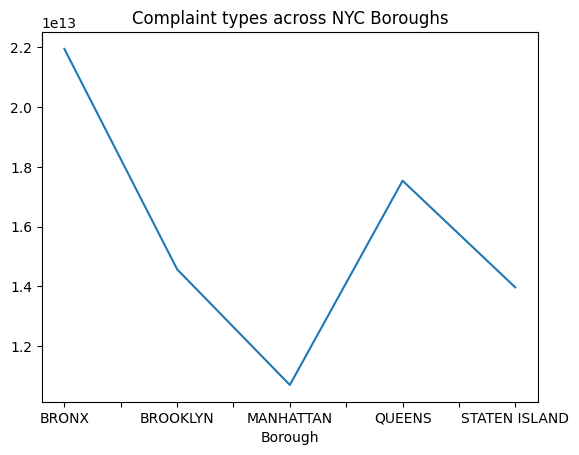

In [25]:
nyc_data['Request_Closing_Time']
nyc_data[['City','Borough','Request_Closing_Time']]
data3 = nyc_data.groupby('Borough')['Request_Closing_Time'].mean()

import matplotlib.pyplot as plt
#import seaborn as sns
data3 = data3.drop('Unspecified')
data3.plot()
plt.xlabel('Borough') 
plt.title('Complaint types across NYC Boroughs')
plt.show()

In [ ]:
nyc_data['Complaint Type'].value_counts().head()

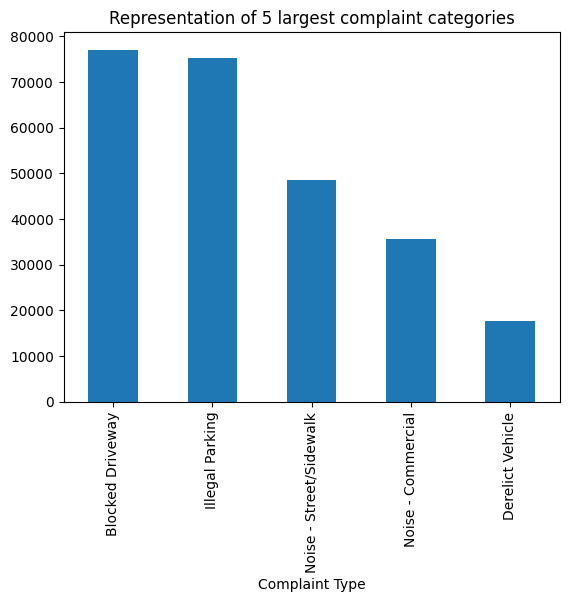

In [26]:
top_5 = nyc_data['Complaint Type'].value_counts().nlargest(5)
top_5.plot(kind = 'bar')
plt.title('Representation of 5 largest complaint categories')
plt.show()